# Milestone 3 - Capstone Final Project
Version: August-2020 Capstone Project
## Author - Priya Asokan

## Instructions
Create a new notebook and perform each of the following tasks and answer the related questions:

1. Build a simple neural networks model
2. Build a DNN model
3. Summarize your findings with examples.  Explain what the manufacturer should focus on to optimize the diaper manufacturing process.
4. Extra credits: build a RNN model taking into account the time series patterns (extra 8 points). 

## Abstract
Dataset used here is SECOM Manufacturing.This contains two different datasets, first set consists of different sensor readings  and the second dataset consists of classification of the data on different timestamps.

I have prepared and cleaned the data. I have built Simple Neural networks and Deep Neural Networks model.I have analysed the models in this project using the metrics used for evaluating them and choosen the best model and the important features the manufacturer should focus on inorder teh optimize their process.

## Problem
This dataset predicts pass/fail tests from SECOM manufacturing process by building neural networks models and evaluating the models with the best scores.

## Summary

### Results of Simple Neural Networks

1. Top 50 features selected based on their weights
2. Test Accuracy - 0.91
3. Precision for faulty class(defects) -0.17
4. Recall for faulty class(defects) -0.06
5. F1-Score for faulty class(defects) - 0.09

### Results of Deep Neural Networks

1. Top 50 features selected based on their weights
2. Test Accuracy - 0.91
3. Precision for faulty class(defects) -0.20
4. Recall for faulty class(defects) -0.06
5. F1-Score for faulty class(defects) - 0.09

#### From Milestone 1 - Logistic Regression using Lasso gave better accuracy  of 0.88, precision - 0.15, recall - 0.25 and f1 score - 0.19
#### From Milestone 2 -  Decision Tree using bagging gave better with accuracy of 0.87, precision -0.09, recall -0.20 and f1-score-0.12.

#### When comparing with the results of milestone 1 and milestone 2- Deep Neural networks provides better results with the features selected based on their weights. Accuracy - 0.91, precision - 0.20, recall - 0.06 and f1 score - 0.09.

#### The manufacturer should focus on the below listed top 50 features seelcted by DNN model inorder to optimize their process.
- feature333,feature44,feature255,feature256,feature252,feature586,feature393,feature582,feature466,feature174,feature356,
- feature473,feature39,feature98,feature272,feature579,feature162,feature371,feature513,feature260,feature305,
- feature577,feature30,feature335,feature397,feature41,feature194,feature554,feature583,feature151,feature387,
- feature348,feature308,feature217,feature220,feature585,feature114,feature234,feature346,feature96,feature169,
- feature286,feature189,feature405,feature382,feature428,feature139,feature295,feature97,feature117




In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Set Random value
SEED=1234
tf.random.set_seed(1234)

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [4]:
# Read Data and Load Dataset
df_secom = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv',sep=" ")
df_secom.shape

(1566, 590)

In [5]:
# Load the first dataset with column names
url = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv"
names = ["feature" + str(x) for x in range(1,591)]
df_secom = pd.read_csv(url, sep=" ", names=names, na_values = "NaN") 

In [6]:
# Load the second dataset with column names
url_l = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom_labels.csv"
secom_labels = pd.read_csv(url_l,sep=" ",names = ["classification","date"],parse_dates = ["date"],na_values = "NaN")
secom_labels.head()

,classification,date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


In [7]:
# Merge two datasets
secom_df = pd.merge(df_secom,secom_labels,left_index = True,right_index = True)
secom_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,...,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feature374,feature375,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature395,feature396,feature397,feature398,feature399,feature400,feature401,feature402,feature403,feature404,feature405,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature415,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature423,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature450,feature451,feature452,feature453,feature454,feature455,feature456,feature457,feature458,feature459,feature460,feature461,feature462,feature463,feature464,feature465,

In [8]:
# transform target to binary
secom_df['classification'].replace({-1: 0, 1: 1},inplace = True)
secom_df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,...,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feature374,feature375,feature376,feature377,feature378,feature379,feature380,feature381,feature382,feature383,feature384,feature385,feature386,feature387,feature388,feature389,feature390,feature391,feature392,feature393,feature394,feature395,feature396,feature397,feature398,feature399,feature400,feature401,feature402,feature403,feature404,feature405,feature406,feature407,feature408,feature409,feature410,feature411,feature412,feature413,feature414,feature415,feature416,feature417,feature418,feature419,feature420,feature421,feature422,feature423,feature424,feature425,feature426,feature427,feature428,feature429,feature430,feature431,feature432,feature433,feature434,feature435,feature436,feature437,feature438,feature439,feature440,feature441,feature442,feature443,feature444,feature445,feature446,feature447,feature448,feature449,feature450,feature451,feature452,feature453,feature454,feature455,feature456,feature457,feature458,feature459,feature460,feature461,feature462,feature463,feature464,feature465,

In [9]:
secom_df.shape

(1567, 592)

In [10]:
secom_df['classification'].value_counts()

0    1463
1     104
Name: classification, dtype: int64

### Data Preparation

In [11]:
# Print the list of columns that have more than 1000 Nan values
featuresNullCount = secom_df.isnull().sum()
colsWithMoreNans = []
for i in featuresNullCount.keys():
    if(featuresNullCount[i] >1000):
        print(i, featuresNullCount[i])
        colsWithMoreNans.append(i)

feature86 1341
feature110 1018
feature111 1018
feature112 1018
feature158 1429
feature159 1429
feature221 1341
feature245 1018
feature246 1018
feature247 1018
feature293 1429
feature294 1429
feature359 1341
feature383 1018
feature384 1018
feature385 1018
feature493 1341
feature517 1018
feature518 1018
feature519 1018


In [12]:
# Drop columns that has a count of more than 1000 Nan values
secom_df.drop(colsWithMoreNans, axis = 1, inplace = True)
secom_df.shape

(1567, 572)

In [13]:
secom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 572 entries, feature1 to date
dtypes: datetime64[ns](1), float64(570), int64(1)
memory usage: 6.8 MB


In [14]:
#fill NA with mean() of each column in Secom dataset
secom_df = secom_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [15]:
# Check for any null value
secom_df.isnull().any().any()

False

In [16]:
# Drop the date column
secom_df = secom_df.drop(columns = ['date'], axis = 1)
secom_df.shape

(1567, 571)

## Data Split

**split data into 3 parts: train (70%), tune (15%), and test (15%). The tune set is used to perform hyperparameter tuning

In [17]:
# Seperate train test set
secom_df_train, secom_df_tune_test = train_test_split(secom_df,
                                    test_size = 0.3,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = secom_df['classification'])

In [18]:
# further evenly split between tune and test
secom_df_tune, secom_df_test = train_test_split(secom_df_tune_test,
                                    test_size=0.5,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [19]:
# double check data dimensions after the split
print(secom_df.shape)
print(secom_df_train.shape)
print(secom_df_tune.shape)
print(secom_df_test.shape)

(1567, 571)
(1096, 571)
(235, 571)
(236, 571)


In [20]:
# print(np.isnan(secom_df_train.any())) #and gets False
# print(np.isnan(secom_df_tune.all())) #and gets True
print(secom_df_tune.columns[secom_df_tune.isnull().any()])

Index([], dtype='object')


### Feature Scaling

In [21]:
# scale numeric features
sc = StandardScaler()
sc.fit(secom_df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
# Set the target train, tune and test values
y_train = secom_df_train["classification"].to_numpy()
y_tune = secom_df_tune["classification"].to_numpy()
y_test = secom_df_test["classification"].to_numpy()

In [23]:
# drop target to predict
secom_df_train = secom_df_train.drop(["classification"], axis=1)
secom_df_tune = secom_df_tune.drop(["classification"], axis=1)
secom_df_test = secom_df_test.drop(["classification"], axis=1)

In [24]:
# feature matrix
X_train = secom_df_train.to_numpy()
X_tune = secom_df_tune.to_numpy()
X_test = secom_df_test.to_numpy()

In [25]:
# feature names
feature_names = secom_df_train.columns

In [26]:
# double check dimensions in training set
print(secom_df_train.shape)
print(X_train.shape)
print(y_train.shape)

#Double check dimensionality in tune set
print(secom_df_tune.shape)
print(X_tune.shape)
print(y_tune.shape)

# double check dimensions in test set
print(secom_df_test.shape)
print(X_test.shape)
print(y_test.shape)

(1096, 570)
(1096, 570)
(1096,)
(235, 570)
(235, 570)
(235,)
(236, 570)
(236, 570)
(236,)


## Build a Simple Neural Networks Model

### Training a classifier using Neural networks with Keras

In [27]:
# Build NN model using keras
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=X_train.shape[1], activation="relu"), # first hidden layer 
    keras.layers.Dense(64,activation="relu"),# second hidden layer
    keras.layers.Dense(1, activation="sigmoid") # output layer 
])

In [28]:
# summary of model object
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               73088     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 81,409
Trainable params: 81,409
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [29]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Train the model

In [30]:
# Fit model
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_tune, y_tune)
)

Train on 1096 samples, validate on 235 samples
Epoch 1/50
1096/1096 [==============================] - 1s 1ms/sample - loss: 59.9248 - accuracy: 0.8650 - val_loss: 11.0060 - val_accuracy: 0.9404
Epoch 2/50
1096/1096 [==============================] - 0s 332us/sample - loss: 5.5372 - accuracy: 0.8896 - val_loss: 29.3786 - val_accuracy: 0.1957
Epoch 3/50
1096/1096 [==============================] - 0s 335us/sample - loss: 2.7731 - accuracy: 0.8759 - val_loss: 1.6419 - val_accuracy: 0.9277
Epoch 4/50
1096/1096 [==============================] - 0s 344us/sample - loss: 1.6134 - accuracy: 0.8914 - val_loss: 6.9555 - val_accuracy: 0.4766
Epoch 5/50
1096/1096 [==============================] - 0s 342us/sample - loss: 1.8442 - accuracy: 0.8823 - val_loss: 1.0553 - val_accuracy: 0.8723
Epoch 6/50
1096/1096 [==============================] - 0s 357us/sample - loss: 1.1068 - accuracy: 0.8914 - val_loss: 0.8137 - val_accuracy: 0.9106
Epoch 7/50
1096/1096 [==============================] - 0s 349us

In [31]:
# you can examine weights and biaes in each layer
weights_nn, biases_nn = model.layers[0].get_weights()

In [32]:
# output weights and biases
print(weights_nn.shape)
print(biases_nn.shape)
print(weights_nn)
print(biases_nn)

(570, 128)
(128,)
[[ 0.00446224 -0.02524818 -0.00366024 ... -0.02132563 -0.1175207
   0.0041733 ]
 [ 0.05154688 -0.01207558  0.0468899  ...  0.01967337 -0.02348506
   0.0598238 ]
 [ 0.06270762  0.00326029 -0.00655295 ... -0.01353882  0.05171099
  -0.0524716 ]
 ...
 [ 0.08221534 -0.00127125  0.02968208 ... -0.00405766 -0.02003204
   0.0265514 ]
 [-0.04169423 -0.07880816  0.06138922 ...  0.05931714 -0.01823934
   0.0585191 ]
 [ 0.06708935  0.03433619  0.03955572 ...  0.04861794 -0.05714696
  -0.03768293]]
[-8.71148131e-07 -8.64499015e-08 -6.08378468e-06 -3.27869475e-06
  1.01164494e-06 -2.58857199e-07 -1.43019179e-05 -1.29643274e-06
 -9.51372442e-07 -4.30946130e-07 -5.51538460e-06 -3.02917010e-06
 -4.74437138e-06  0.00000000e+00  1.02106003e-06 -3.97511894e-06
  1.26650619e-07 -8.72083376e-07 -4.70932355e-06 -3.25945598e-06
 -1.15671651e-06 -1.18736025e-05 -5.53572772e-06 -3.86024936e-07
  9.50881507e-09  9.13784788e-07  2.87803630e-07 -4.92704970e-08
 -4.41749194e-07 -5.89491094e-07 -3.

In [33]:
# Get the average weights for each feature
weights_nn_avg = np.mean(weights_nn, axis=1)
print(weights_nn_avg)

[-2.14306545e-03 -3.33948550e-03 -6.45789877e-03 -9.87463631e-03
 -4.86634206e-03 -7.12550245e-05  8.46139155e-05 -3.64297023e-03
 -3.89976427e-03 -1.91116752e-03  4.02929448e-03  6.00591488e-03
 -7.45286793e-03  3.27243190e-03  6.84849452e-04  4.13969532e-03
 -1.14331720e-03  7.04489881e-04 -6.33720821e-03  7.02177640e-04
  1.60057005e-03  1.51065383e-02 -1.05346283e-02  1.18249767e-02
  4.04958194e-03 -6.94658048e-03 -8.92382348e-04  3.76133970e-03
 -4.03689686e-04 -8.32865015e-03 -7.38678081e-03 -2.73141288e-03
 -8.55241902e-03 -2.46010022e-03 -6.06004475e-03 -1.20287971e-03
  2.35962332e-03 -6.91905152e-03  1.65719853e-03 -5.96672948e-03
  3.59786861e-03 -8.30154307e-03  4.89661330e-03  1.49341940e-03
 -4.84451232e-03 -1.67608121e-03  3.00690439e-03  6.53899042e-05
  8.32936540e-03  3.60123045e-03  2.17606663e-03  3.55293928e-03
  5.64141665e-03 -6.34955661e-03 -6.10018149e-04 -1.95358358e-02
  1.81763223e-03  7.88562372e-03 -2.15549255e-04 -4.02044877e-03
  2.70822435e-03 -1.03836

 -5.49729355e-03  3.38337990e-03]


In [34]:
# Get the indices of top 50 features weights
indices = (-weights_nn_avg).argsort()[:50]
print(indices.shape)
for i in indices:
    print (feature_names[i],weights_nn_avg[i])

(50,)
feature498 0.01591226
feature22 0.015106538
feature285 0.013558537
feature242 0.01328521
feature374 0.012813321
feature80 0.012709387
feature481 0.012476729
feature229 0.012394367
feature386 0.0121520255
feature24 0.011824977
feature283 0.011721667
feature555 0.0116163865
feature179 0.011037339
feature267 0.010614603
feature520 0.010188022
feature554 0.009499272
feature305 0.009216664
feature444 0.00906229
feature231 0.008913105
feature256 0.008851263
feature352 0.008781625
feature541 0.008777403
feature81 0.008763543
feature367 0.008592054
feature241 0.008332424
feature49 0.008329365
feature181 0.007922877
feature58 0.007885624
feature88 0.007878719
feature474 0.0077937515
feature366 0.007338452
feature575 0.007325536
feature394 0.0073185666
feature360 0.007300713
feature83 0.0072985003
feature299 0.0072016846
feature351 0.0071726553
feature350 0.007128506
feature325 0.0070609273
feature341 0.007031586
feature361 0.0069623273
feature222 0.0069139116
feature144 0.006875984
featur

## Model Performance Evaluation

In [35]:
# Model parameters
history.params

{'batch_size': 16,
 'epochs': 50,
 'steps': 69,
 'samples': 1096,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [36]:
# Dictionary with loss, accuracy
history_dict = history.history
history_dict

{'loss': [59.924760407992785,
  5.537168521338447,
  2.773127497286789,
  1.6133625283481734,
  1.8441501770267859,
  1.1067775356612013,
  0.7846598869933764,
  0.8599069584024784,
  0.647123428217436,
  0.583794453736636,
  0.3991270193542918,
  0.3758524452492486,
  0.4109116172227655,
  0.3655516241649914,
  0.278292169332178,
  0.323942224192603,
  0.29094367315924735,
  0.2801148457466251,
  0.2490423861177244,
  0.2742888148343802,
  0.23936133676745597,
  0.29069636128570914,
  0.24950209279021207,
  0.2383988870912823,
  0.239753592439866,
  0.22096934494474074,
  0.2246182238560741,
  0.22178124516767306,
  0.2052904445351693,
  0.20968991954450625,
  0.20575959711288014,
  0.22734155049071694,
  0.21319751419725208,
  0.20572191384709337,
  0.20127955801703418,
  0.20008711750707486,
  0.20002827568346784,
  0.1839779126219941,
  0.18546757055786403,
  0.18982285756046754,
  0.19724438340831413,
  0.1884407947846029,
  0.19943137683083106,
  0.18164863392547534,
  0.18594317

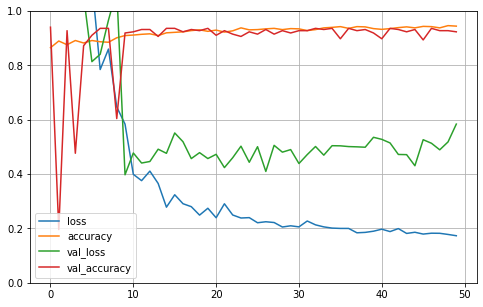

In [37]:
# Plots
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [38]:
# output
loss_tune, acc_tune = model.evaluate(X_tune, y_tune)

print("Tune set accuracy:", acc_tune)

235/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
# predict
y_tune_prob = model.predict(X_tune)
y_tune_pred = (model.predict(X_tune) >= 0.5).astype("int32")

In [40]:
print(y_tune_prob[:10])
print(y_tune_pred[:10])

[[0.00136957]
 [0.00116953]
 [0.00312606]
 [0.933889  ]
 [0.        ]
 [0.03463596]
 [0.00369725]
 [0.01549929]
 [0.03075841]
 [0.01736856]]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [41]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[217   4]
 [ 14   0]]


In [42]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)

0.9234042553191489

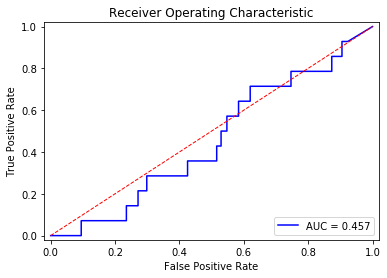

In [43]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

### Save the Model

In [44]:
# save model
model.save("Secom_keras_model.h5")

### Model Performance in Test Set

In [45]:
# load saved model
model_saved = keras.models.load_model("Secom_keras_model.h5")

In [46]:
# predict
y_test_prob = model_saved.predict(X_test)
y_test_pred = (model_saved.predict(X_test) >= 0.5).astype("int32")

In [47]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[214   5]
 [ 16   1]]


In [48]:
# calculate accuracy
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.9110169491525424


In [49]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       219
           1       0.17      0.06      0.09        17

    accuracy                           0.91       236
   macro avg       0.55      0.52      0.52       236
weighted avg       0.88      0.91      0.89       236



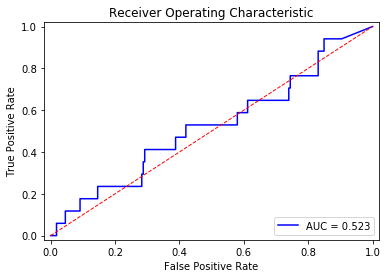

In [50]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

### Results of Simple Neural Networks

1. Top 50 features selected based on the weights.
2. Test Accuracy - 0.91
3. Precision for faulty class(defects) -0.17
4. Recall for faulty class(defects) -0.06
5. F1-Score for faulty class(defects) - 0.09

### Build a DNN model

In [51]:
#Build a deep neural networks model by adding more hidden layers
model = keras.Sequential([
    keras.layers.Dense(1024, input_dim=X_train.shape[1], activation="relu"), # first hidden layer 
    keras.layers.Dense(512, activation="relu"), # second hidden layer
    keras.layers.Dense(256, activation="relu"), # third hidden layer
    keras.layers.Dense(128, activation="relu"), # fourth hidden layer
    keras.layers.Dense(64, activation="relu"), # fifth hidden layer
    keras.layers.Dense(32, activation="relu"), # sixth hidden layer
    keras.layers.Dense(16, activation="relu"), # seventh hidden layer    
    keras.layers.Dense(1, activation="sigmoid") # output layer 
])

In [52]:
# summary of model object
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              584704    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

## Compile the Model

In [53]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Train the model

In [54]:
# Fit model
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_tune, y_tune)
)

Train on 1096 samples, validate on 235 samples
Epoch 1/50
1096/1096 [==============================] - 2s 2ms/sample - loss: 1.4873 - accuracy: 0.8814 - val_loss: 0.8600 - val_accuracy: 0.9404
Epoch 2/50
1096/1096 [==============================] - 1s 780us/sample - loss: 0.6663 - accuracy: 0.9005 - val_loss: 4.3927 - val_accuracy: 0.2255
Epoch 3/50
1096/1096 [==============================] - 1s 802us/sample - loss: 0.5075 - accuracy: 0.9005 - val_loss: 0.2956 - val_accuracy: 0.9191
Epoch 4/50
1096/1096 [==============================] - 1s 853us/sample - loss: 0.4853 - accuracy: 0.9069 - val_loss: 0.4799 - val_accuracy: 0.8340
Epoch 5/50
1096/1096 [==============================] - 1s 688us/sample - loss: 0.5084 - accuracy: 0.9033 - val_loss: 0.3440 - val_accuracy: 0.9404
Epoch 6/50
1096/1096 [==============================] - 1s 776us/sample - loss: 0.3098 - accuracy: 0.9161 - val_loss: 0.3530 - val_accuracy: 0.9191
Epoch 7/50
1096/1096 [==============================] - 1s 822us/sa

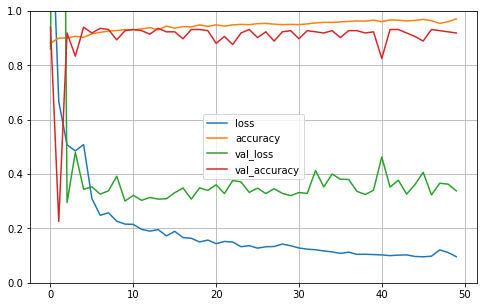

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [56]:
# output
loss_tune, acc_tune = model.evaluate(X_tune, y_tune)

print("Tune set accuracy:", acc_tune)

235/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
# you can examine weights and biaes in each layer
weights, biases = model.layers[0].get_weights()

In [58]:
# output weights abd biases
print(weights.shape)
print(biases.shape)
print(weights)
print(biases)

(570, 1024)
(1024,)
[[ 0.02164462 -0.02138146  0.02431396 ...  0.01861032 -0.02890288
   0.04490912]
 [-0.01390968  0.01355304  0.00033107 ...  0.02908102  0.01699665
   0.02330169]
 [ 0.02911099 -0.0328319  -0.00156886 ... -0.03433115  0.01361971
  -0.01434285]
 ...
 [ 0.02728171 -0.01594306 -0.03418261 ... -0.05808511 -0.02583438
  -0.03649882]
 [ 0.05986841 -0.03418552 -0.05878593 ... -0.00907271  0.02155549
  -0.00331764]
 [-0.05033611  0.03144309  0.00373288 ...  0.02981665 -0.01251302
  -0.05082019]]
[-1.09175380e-08  2.55902819e-07 -2.58642871e-07 ...  1.05465276e-07
 -4.32285333e-07  3.23617456e-07]


In [59]:
# Get the average weight of neurons for each feature
weights_average = np.mean(weights, axis=1)
print(weights_average)

[ 1.06806459e-04 -4.51149303e-04 -4.48915409e-04 -5.87633578e-04
  3.11003561e-04 -6.36430050e-04  3.92972812e-04 -7.77331705e-04
 -3.65095213e-04 -5.56718151e-04 -5.14427084e-04 -3.69708287e-05
 -5.23039489e-04  1.41789671e-04  4.46608756e-05 -8.28826916e-04
  9.61166981e-04  5.58726606e-05 -7.34565663e-04  2.57085951e-04
 -1.43276667e-03 -1.45547558e-04  1.79792522e-04  6.86725019e-04
  5.48304175e-04 -6.28443027e-04  1.19274575e-03 -4.05162224e-04
  8.71050113e-04  1.79583288e-03 -1.48845161e-03  1.28371594e-03
  1.02290441e-03 -4.18208714e-04  8.82828608e-04 -2.41139508e-03
 -3.15862999e-04 -1.81327516e-04  1.91863044e-03  2.70570279e-04
  1.71919854e-03 -4.18595446e-04 -2.28723232e-03  3.49960430e-03
 -1.94262573e-03 -1.47827179e-03 -1.26312592e-03  8.92412500e-05
  5.77804632e-04  3.82486964e-04 -5.14232903e-04 -8.47286545e-04
 -1.37184281e-03 -1.38986798e-04  9.69966000e-04 -4.89857397e-04
  4.50507447e-04  1.69630919e-04 -3.26707785e-04  1.04793068e-03
  9.63151979e-04  8.12979

In [60]:
# Get the indices of top 50 features weights
indices = (-weights_average).argsort()[:50]
print(indices.shape)
for i in indices:
    print (feature_names[i],weights_average[i])

(50,)
feature333 0.0040836046
feature44 0.0034996043
feature255 0.0028342456
feature256 0.0027143136
feature252 0.002633369
feature586 0.0026247073
feature393 0.0023057256
feature582 0.0022263199
feature466 0.0021208306
feature174 0.002087762
feature356 0.002070267
feature473 0.0020635794
feature39 0.0019186304
feature98 0.0018797831
feature272 0.0018680706
feature579 0.0018657485
feature162 0.0018634247
feature371 0.0018554961
feature513 0.0018462403
feature260 0.0018314298
feature305 0.0018142149
feature577 0.0018018174
feature30 0.0017958329
feature335 0.0017861166
feature397 0.0017344991
feature41 0.0017191985
feature194 0.0017138524
feature554 0.0017055152
feature583 0.001680769
feature151 0.001665802
feature387 0.0016506831
feature348 0.0016303216
feature308 0.0016254156
feature217 0.0015978597
feature220 0.0015975793
feature585 0.0015550825
feature114 0.0015506784
feature234 0.0014931094
feature346 0.0014879983
feature96 0.0014512122
feature169 0.0014469997
feature286 0.00144651

In [61]:
# predict
y_tune_prob = model.predict(X_tune)
y_tune_pred = (model.predict(X_tune) >= 0.5).astype("int32")

In [62]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[216   5]
 [ 14   0]]


In [63]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)


0.9191489361702128

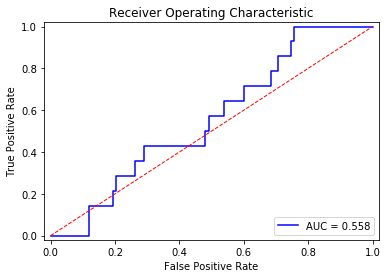

In [64]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

### Save the model

In [65]:
# save model
model.save("Secom_DNN_keras_model.h5")

### Model Performance in Test Set

In [66]:
# load saved model
model_saved = keras.models.load_model("Secom_DNN_keras_model.h5")

In [67]:
# predict
y_test_prob = model_saved.predict(X_test)
y_test_pred = (model_saved.predict(X_test) >= 0.5).astype("int32")

In [68]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[215   4]
 [ 16   1]]


In [69]:
# calculate accuracy
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.9152542372881356


In [70]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       219
           1       0.20      0.06      0.09        17

    accuracy                           0.92       236
   macro avg       0.57      0.52      0.52       236
weighted avg       0.88      0.92      0.89       236



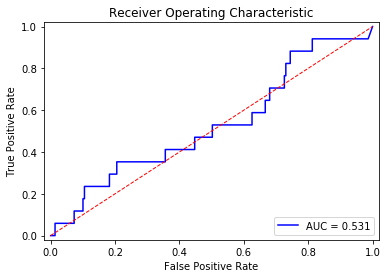

In [71]:
 #ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

### Results of Deep Neural Networks

1. Top 50 features selected based on their weights.
2. Test Accuracy - 0.91
3. Precision for faulty class(defects) -0.20
4. Recall for faulty class(defects) -0.06
5. F1-Score for faulty class(defects) - 0.09


